In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


target_db = "DRH"
network_type = "large"

In [20]:
features_combined = pd.read_csv(f'../../../2_feature_extraction/{network_type}/features_{target_db} Target.csv', index_col=0)
structure_feature_names = features_combined.columns[1:27]
target_feature_names = [feature for feature in features_combined.columns if "target" in feature and "cov" not in feature and not "mercator" in feature]
neighbor_feature_names = [feature for feature in features_combined.columns if "neighbor" in feature and "cov" not in feature and not "mercator" in feature]
covidome_feature_names = [feature for feature in features_combined.columns if "cov" in feature]

features_combined = features_combined[features_combined['Outcome'] != 'Very Weak']
features_combined = features_combined[features_combined['Outcome'] != 'Low']
features_combined['Outcome'] = features_combined['Outcome'].replace({'Weak': 'Effect'})
features_combined['Outcome'] = features_combined['Outcome'].replace({'Strong': 'Effect'})
features_combined = features_combined.drop(['Target', 'Neighbor'], axis=1)

features_combined.to_csv('feature_matrix.csv')
features_combined = features_combined.drop('Outcome', axis=1)

columns_with_spl = features_combined.filter(like="spl")
columns_with_spl


,mean_spl_to_covidome_min,mean_spl_to_covidome_mean,mean_spl_to_covidome_median,mean_spl_to_covidome_max,min_spl_to_covidome_min,min_spl_to_covidome_mean,min_spl_to_covidome_median,min_spl_to_covidome_max
BRD-K45293975,2.362229,2.781513,2.705882,3.715170,0.0,1.000000,1.0,2.0
BRD-K78177893,2.461300,2.873065,2.470588,3.687307,0.0,1.000000,1.0,2.0
BRD-K31965398,3.176471,3.226006,3.226006,3.275542,1.0,1.500000,1.5,2.0
BRD-K33127281,3.040248,3.430341,3.438080,3.860681,1.0,1.833333,2.0,3.0
BRD-K01826783,3.690402,3.690402,3.690402,3.690402,2.0,2.000000,2.0,2.0
...,...,...,...,...,...,...,...,...
BRD-K00003540,2.944272,2.944272,2.944272,2.944272,1.0,1.000000,1.0,1.0
BRD-K77008974,2.944272,2.944272,2.944272,2.944272,1.0,1.000000,1.0,1.0
BRD-K04266228,2.811146,2.959752,3.015480,3.052632,1.0,1.333333,1.0,2.0
BRD-K50387473,2.919505,3.561920,3.571207,4.185759,1.0,2.000000,2.0,3.0


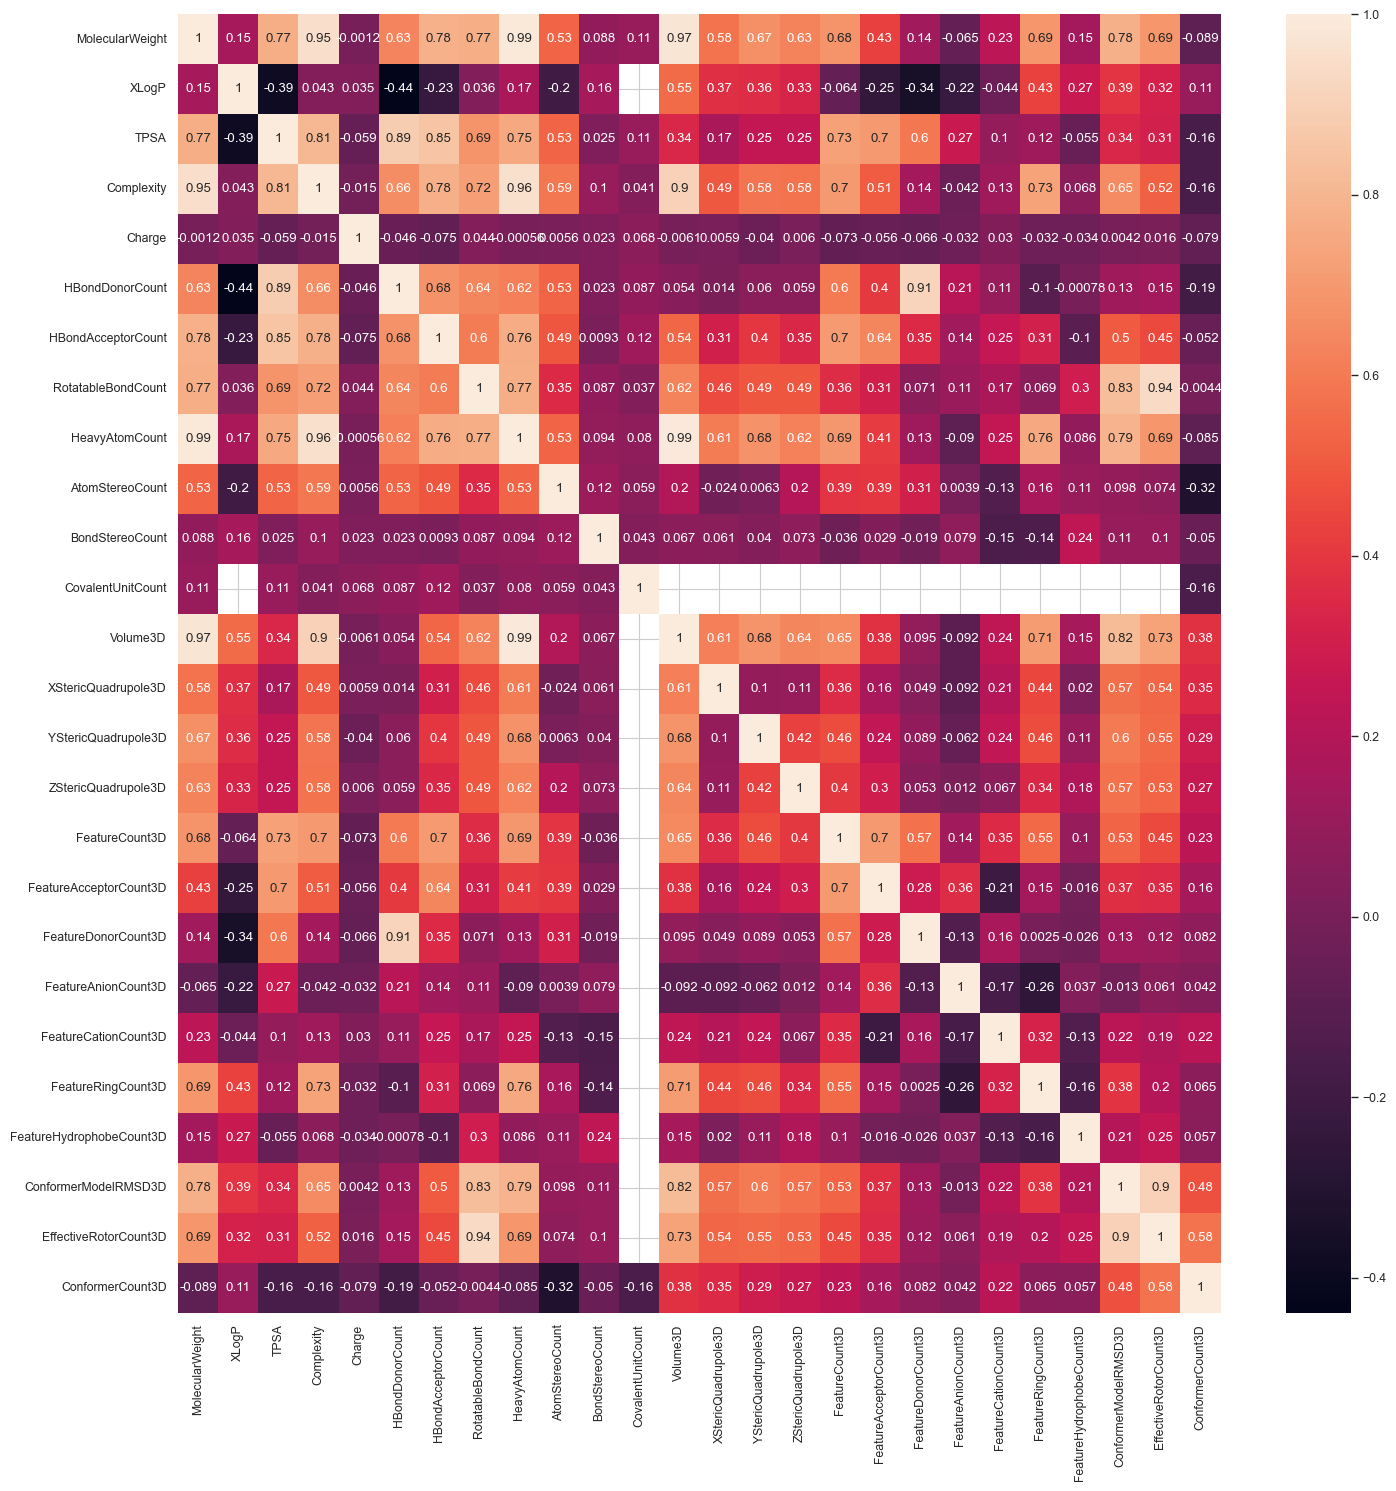

In [11]:
sns.set("paper", font_scale=1)
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
sns.heatmap(data=features_combined[structure_feature_names].corr(), ax=ax, annot=True)
plt.tight_layout()

fig.savefig('heatmap_structure.pdf', dpi=50, format='pdf')
fig.savefig('heatmap_structure.png', dpi=50, format='png')

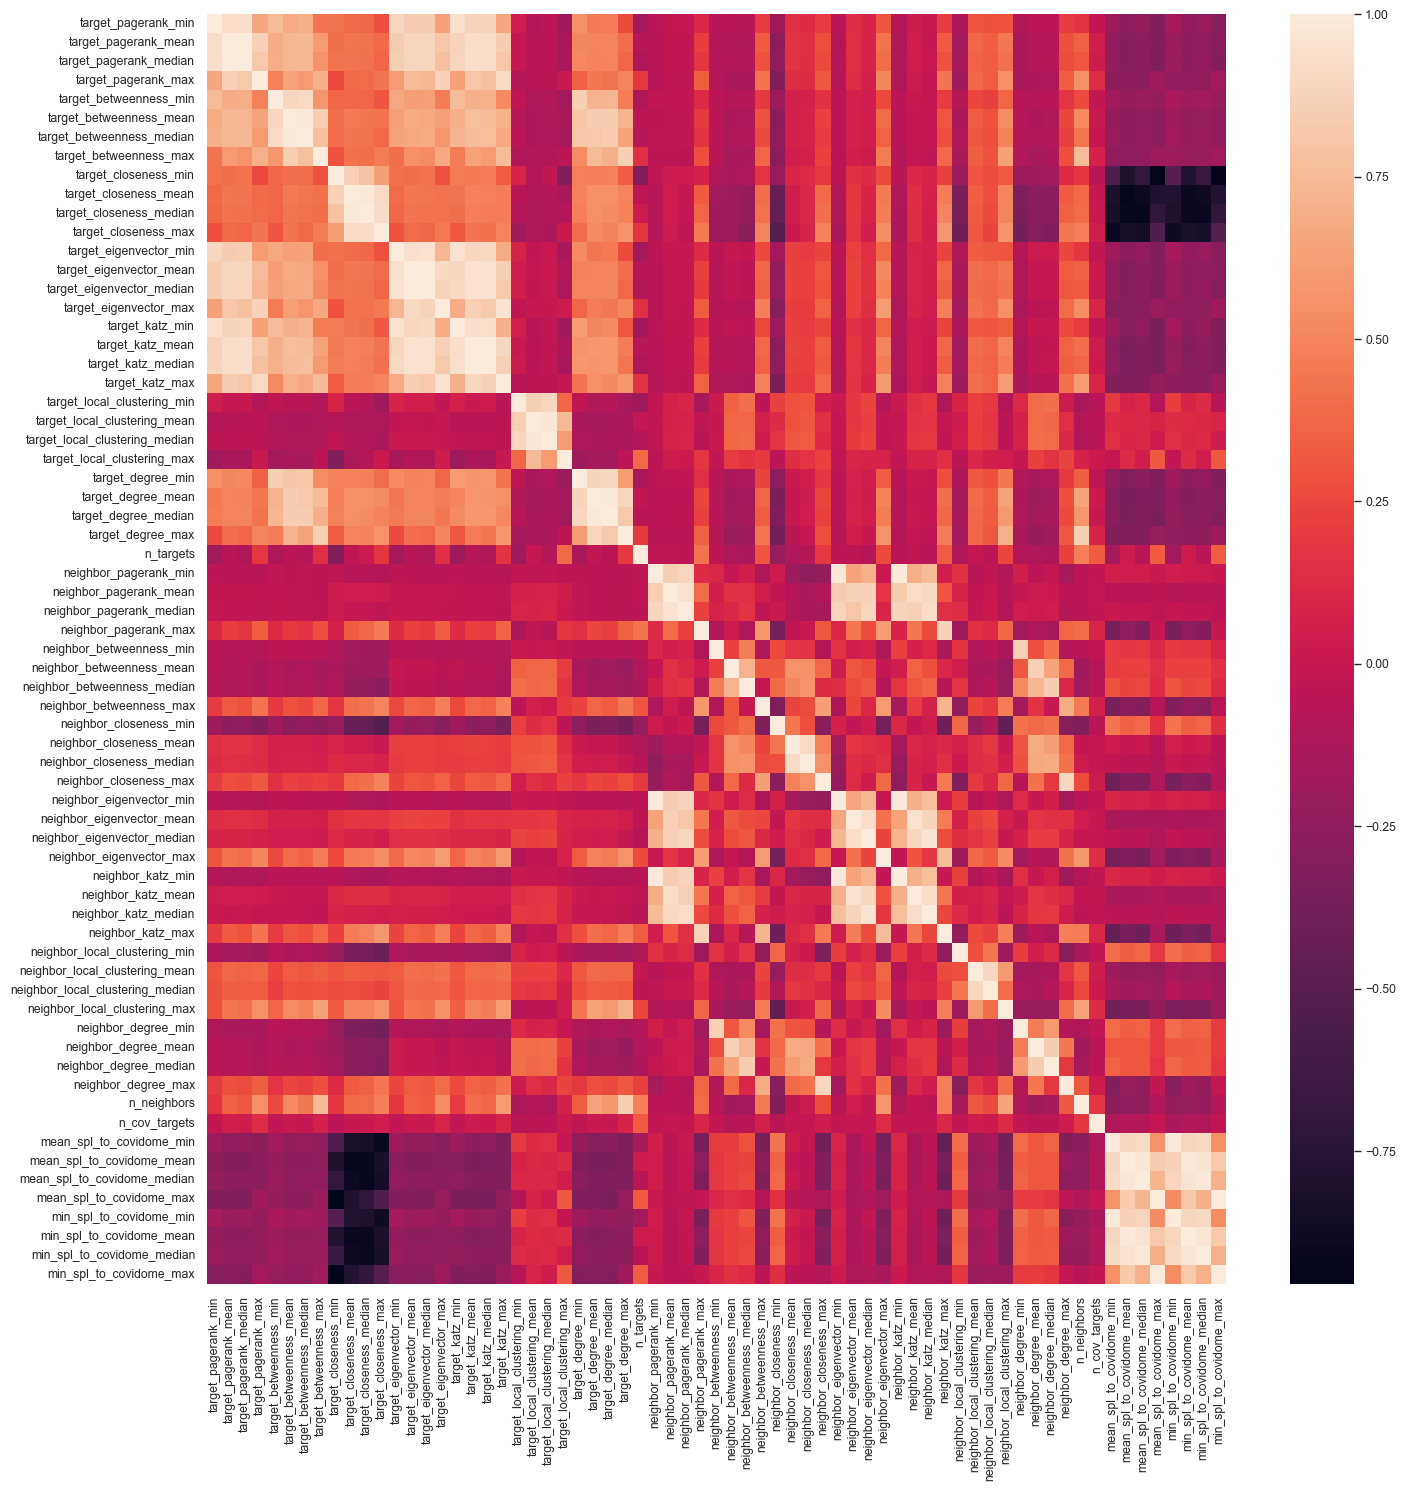

In [16]:
sns.set("paper", font_scale=1)
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
sns.heatmap(data=features_combined[target_feature_names+neighbor_feature_names+covidome_feature_names].corr(), ax=ax)
plt.tight_layout()

fig.savefig('heatmap_network.pdf', dpi=50, format='pdf')
fig.savefig('heatmap_network.png', dpi=50, format='png')